In [17]:
from utils import *
from data_utils import *
from metrics import *
from plots import *

## Code to create dataset for Transfer Learning from the first 5 to the second 5 classes of MNIST

## Custom fuctions. Note: integrate into util.py

# Transfer Learning from the first 5 to the second 5 of MNIST. Default initialization with freezing.

In [18]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
depth = 5

dataset = TransferLearningMNIST(batch_size)
dataset_wrapped = TransferLearningMNISTWrapper(dataset, 'pretrain')
params = dict(device=device,
                width=20, lr=0.01, num_train=4,
                sb=0.05, depth= depth, sw=1.7346938775510203, early_stop_patience = 2, activation_function='tanh')

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params, gaussian_init = True).to(device)

In [19]:
dataset.output_dim

5

In [20]:
#print model summary
print(model)

Sequential(
  (linear0): Linear(in_features=784, out_features=20, bias=True)
  (activation0): Tanh()
  (linear1): Linear(in_features=20, out_features=20, bias=True)
  (activation1): Tanh()
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (activation2): Tanh()
  (linear3): Linear(in_features=20, out_features=20, bias=True)
  (activation3): Tanh()
  (linear4): Linear(in_features=20, out_features=5, bias=True)
  (activation4): LogSoftmax(dim=1)
)


In [21]:
results, variances = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device = 'cpu',cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 4.011111259460449, Variance of Variance: 3.415602922439575
Layer activation0 - Variance: 0.3728329539299011, Variance of Variance: 0.10636596381664276
Layer linear1 - Variance: 0.5549074411392212, Variance of Variance: 0.09900069236755371
Layer activation1 - Variance: 0.21935462951660156, Variance of Variance: 0.015022399835288525
Layer linear2 - Variance: 0.3086557984352112, Variance of Variance: 0.027354588732123375
Layer activation2 - Variance: 0.14081372320652008, Variance of Variance: 0.006553394254297018
Layer linear3 - Variance: 0.16412226855754852, Variance of Variance: 0.006013921461999416
Layer activation3 - Variance: 0.09752923995256424, Variance of Variance: 0.003152604913339019
Layer linear4 - Variance: 0.5766780972480774, Variance of Variance: 0.06838709861040115
Layer activation4 - Variance: 0.4668489396572113, Variance of Variance: 0.13842380046844482


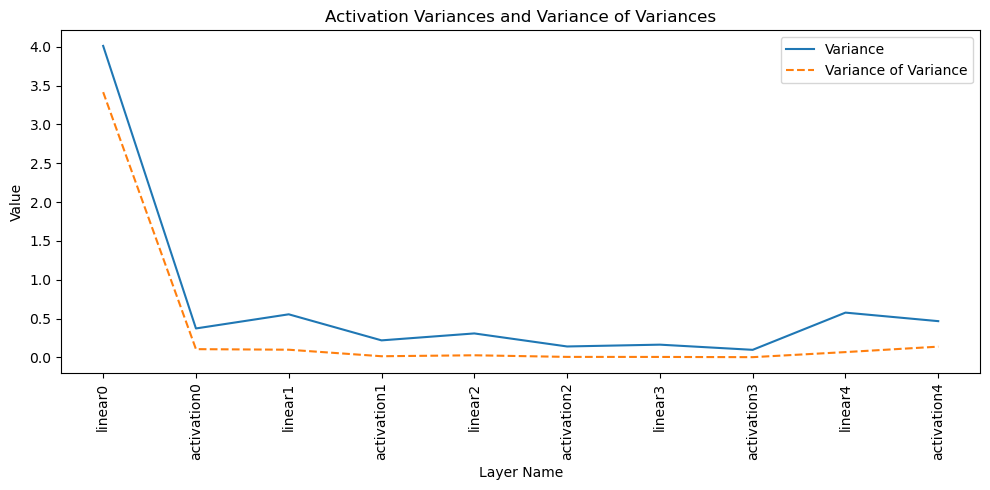

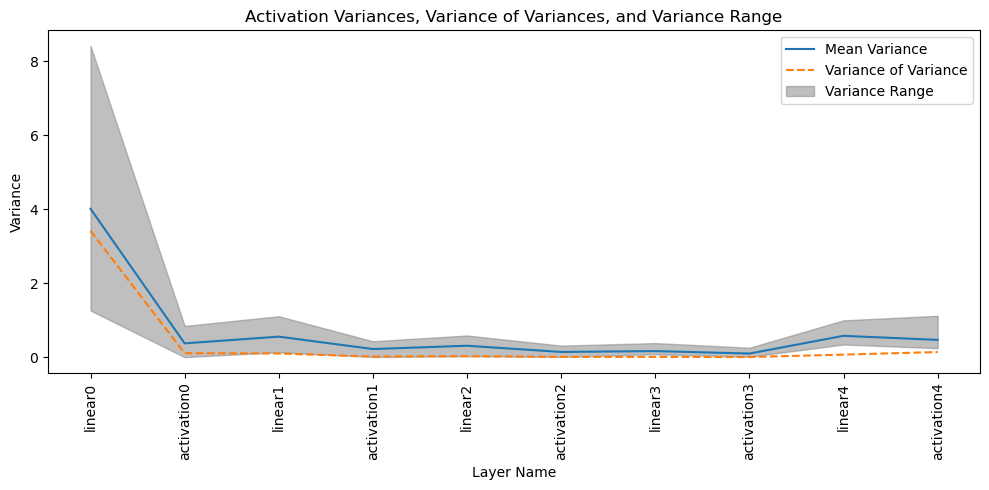

In [22]:
plot_variances(variances, results)

/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(activation_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(activation_layer_names, rotation=90)


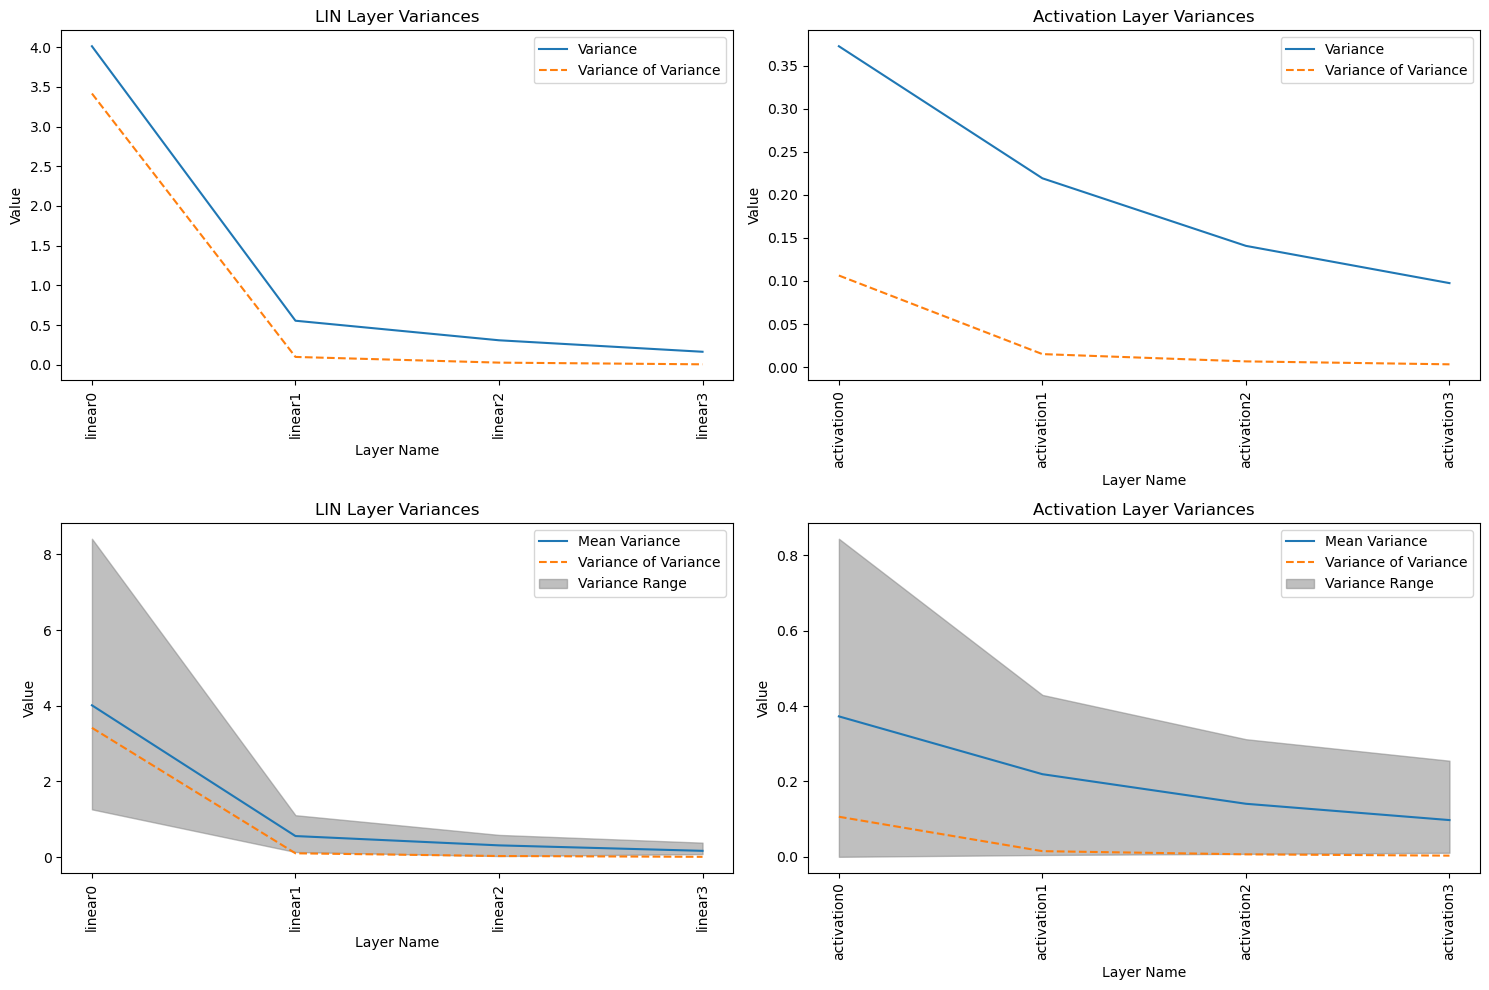

In [23]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

In [25]:
pretrain_train_acc, pretrain_test_acc, pre_trained_model, pretraining_checkpoints = compute_training_acc_epochs(model, dataset_wrapped, params, debug=True, save_checkpoints=True)

Epoch: 0 	Training Accuracy: 90.21%
Validation Accuracy: 89.93%
Epoch: 1 	Training Accuracy: 91.11%
Validation Accuracy: 90.65%
Epoch: 2 	Training Accuracy: 91.83%
Validation Accuracy: 91.47%
Epoch: 3 	Training Accuracy: 92.23%
Validation Accuracy: 91.79%


In [49]:
# Save model state dictionary
torch.save(pre_trained_model.state_dict(), "pretrained_MNIST_model_50-50.pth")
torch.save(pretraining_checkpoints, 'pretrained_MNIST_model_50-50_checkpoints.pth')

Layer linear0 - Variance: 6.33962345123291, Variance of Variance: 8.453245162963867
Layer activation0 - Variance: 0.41818147897720337, Variance of Variance: 0.1158110648393631
Layer linear1 - Variance: 0.8113262057304382, Variance of Variance: 0.1554795205593109
Layer activation1 - Variance: 0.2971530854701996, Variance of Variance: 0.01957697980105877
Layer linear2 - Variance: 0.7207432985305786, Variance of Variance: 0.2373320460319519
Layer activation2 - Variance: 0.31297242641448975, Variance of Variance: 0.02452576346695423
Layer linear3 - Variance: 0.7557601928710938, Variance of Variance: 0.1864139884710312
Layer activation3 - Variance: 0.334489107131958, Variance of Variance: 0.016740819439291954
Layer linear4 - Variance: 6.600075721740723, Variance of Variance: 10.463818550109863
Layer activation4 - Variance: 6.70174503326416, Variance of Variance: 4.32985258102417


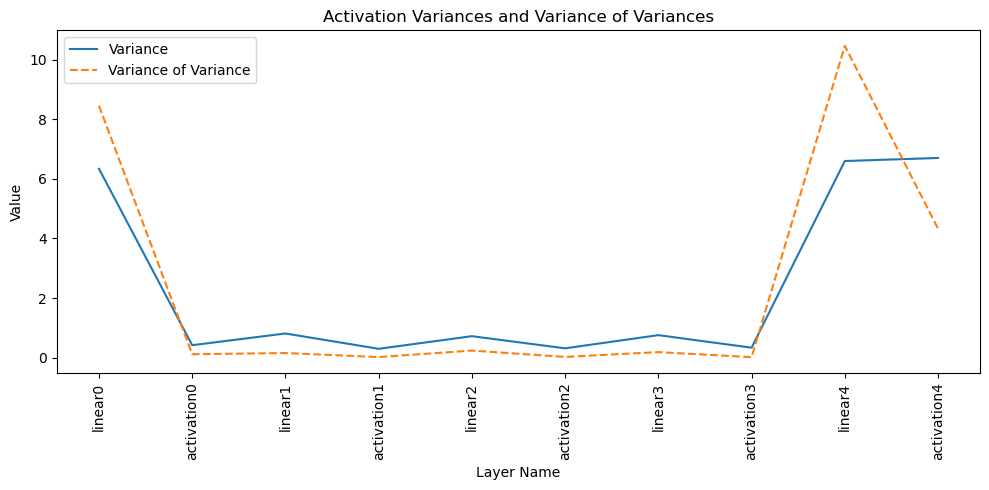

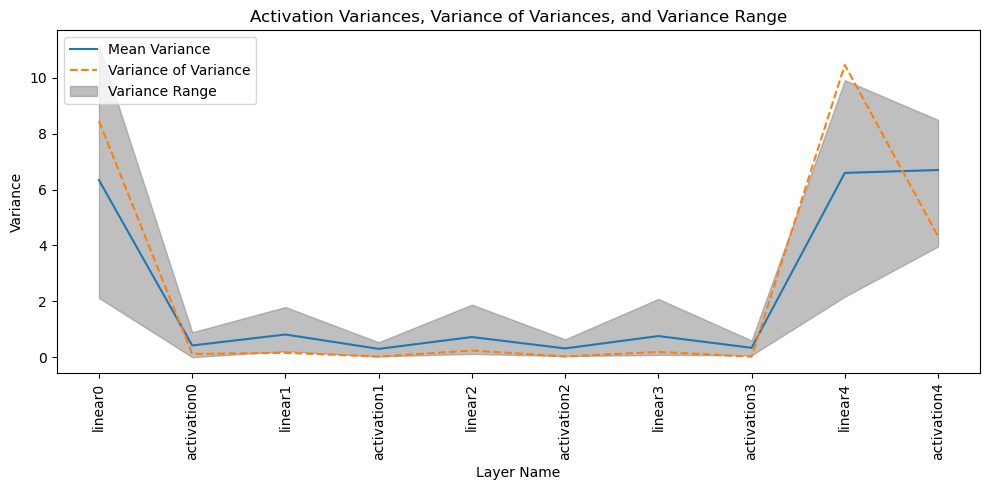

In [28]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

plot_variances(variances, results)

/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(activation_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(activation_layer_names, rotation=90)


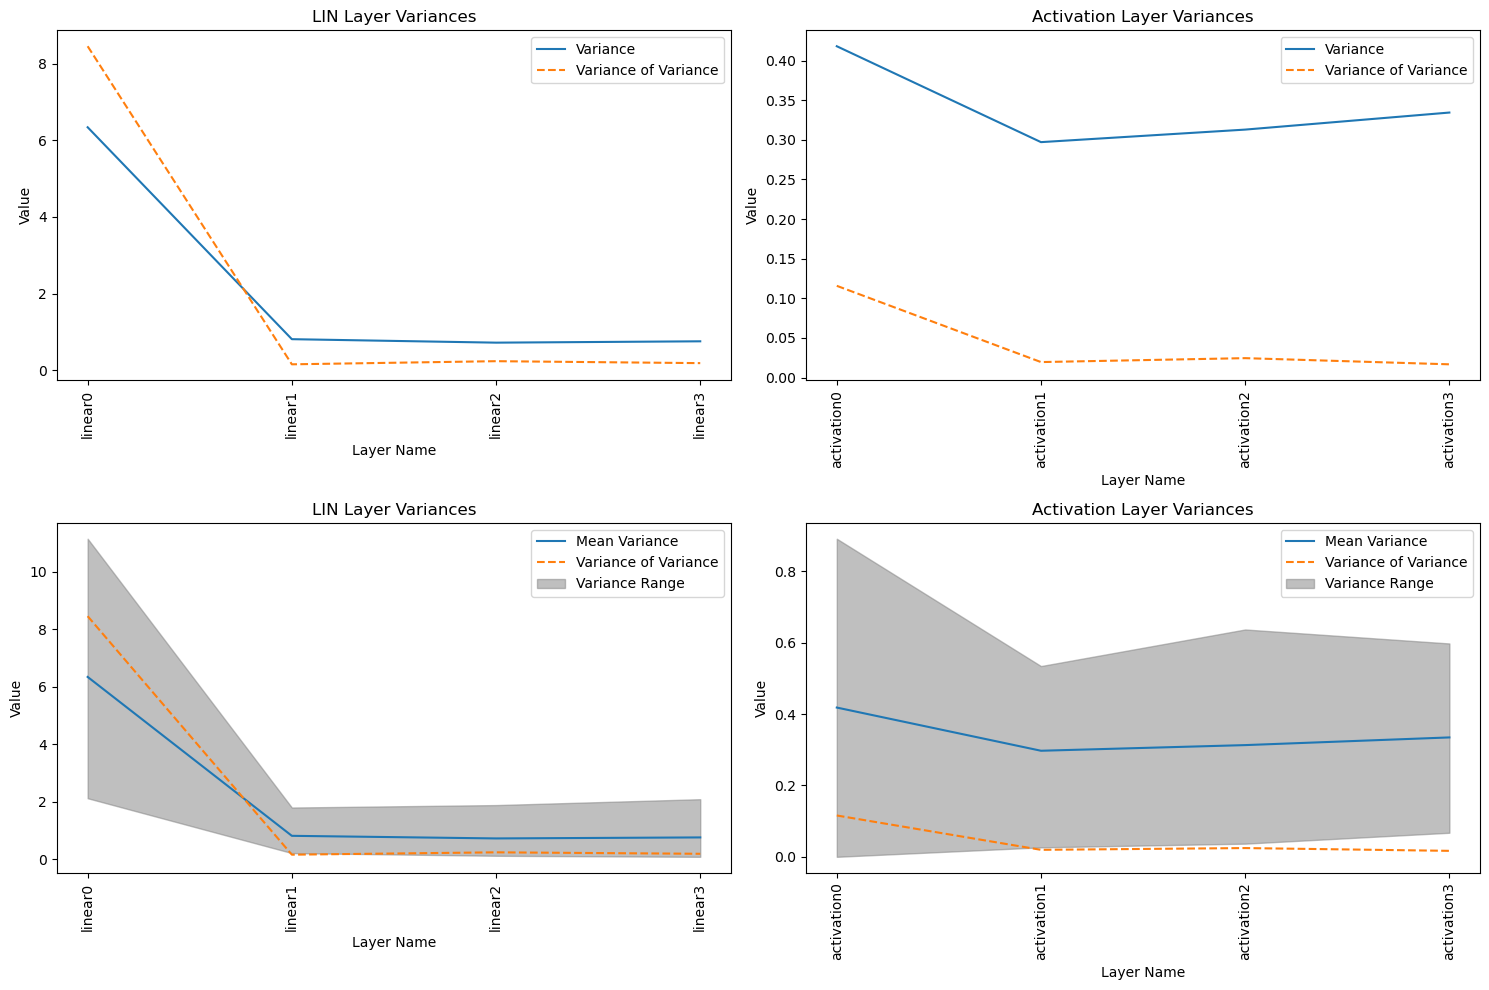

In [29]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

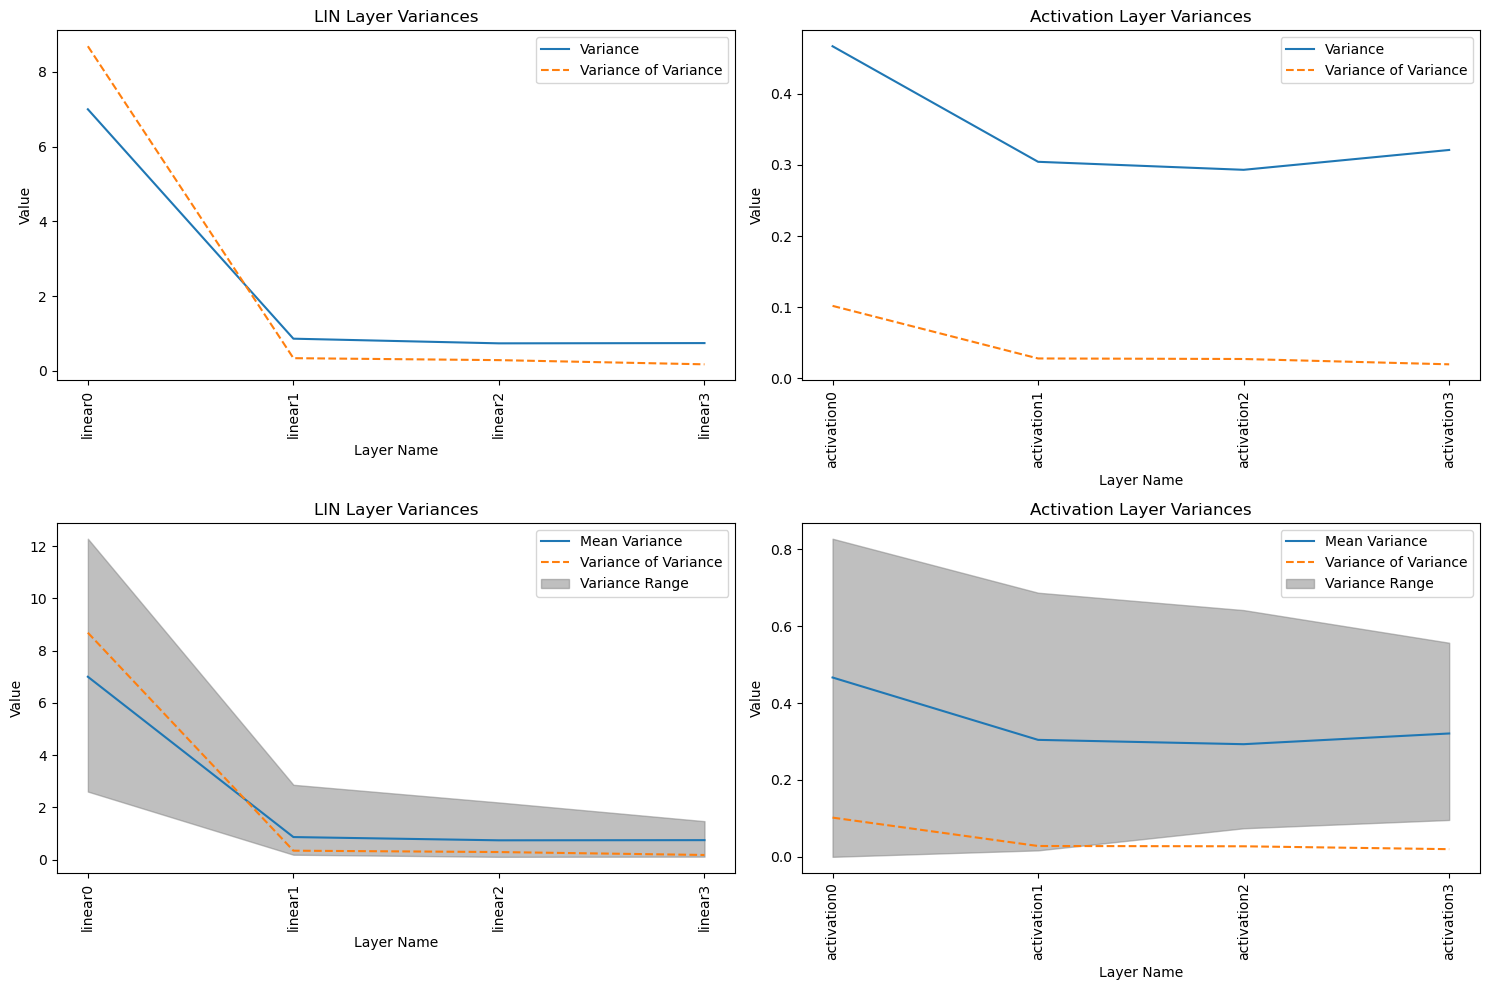

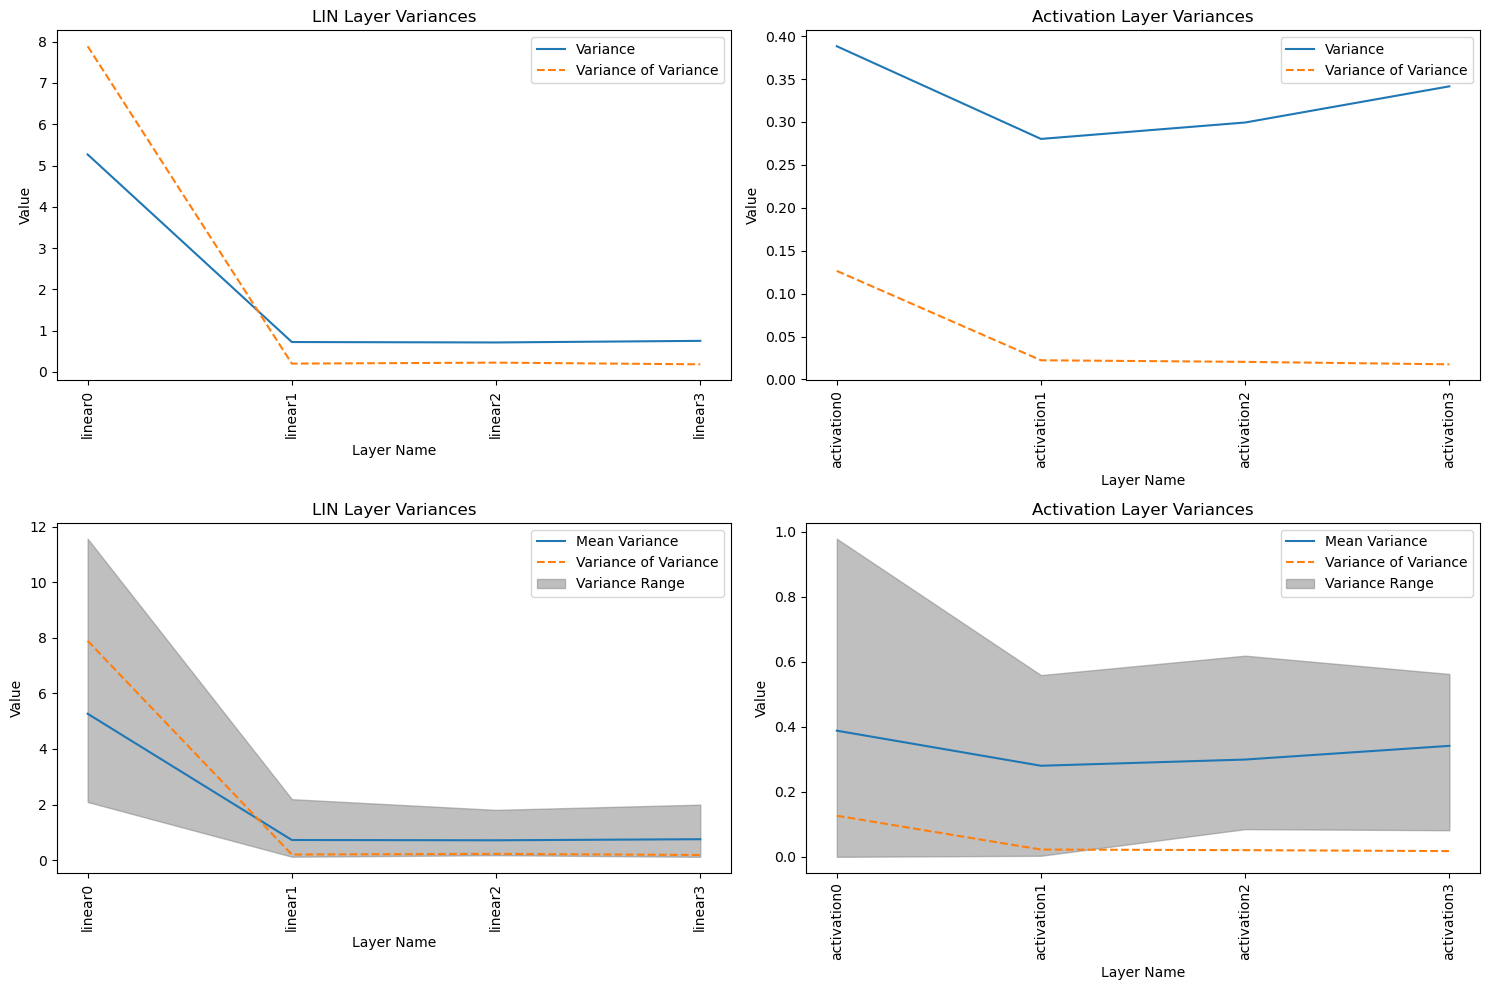

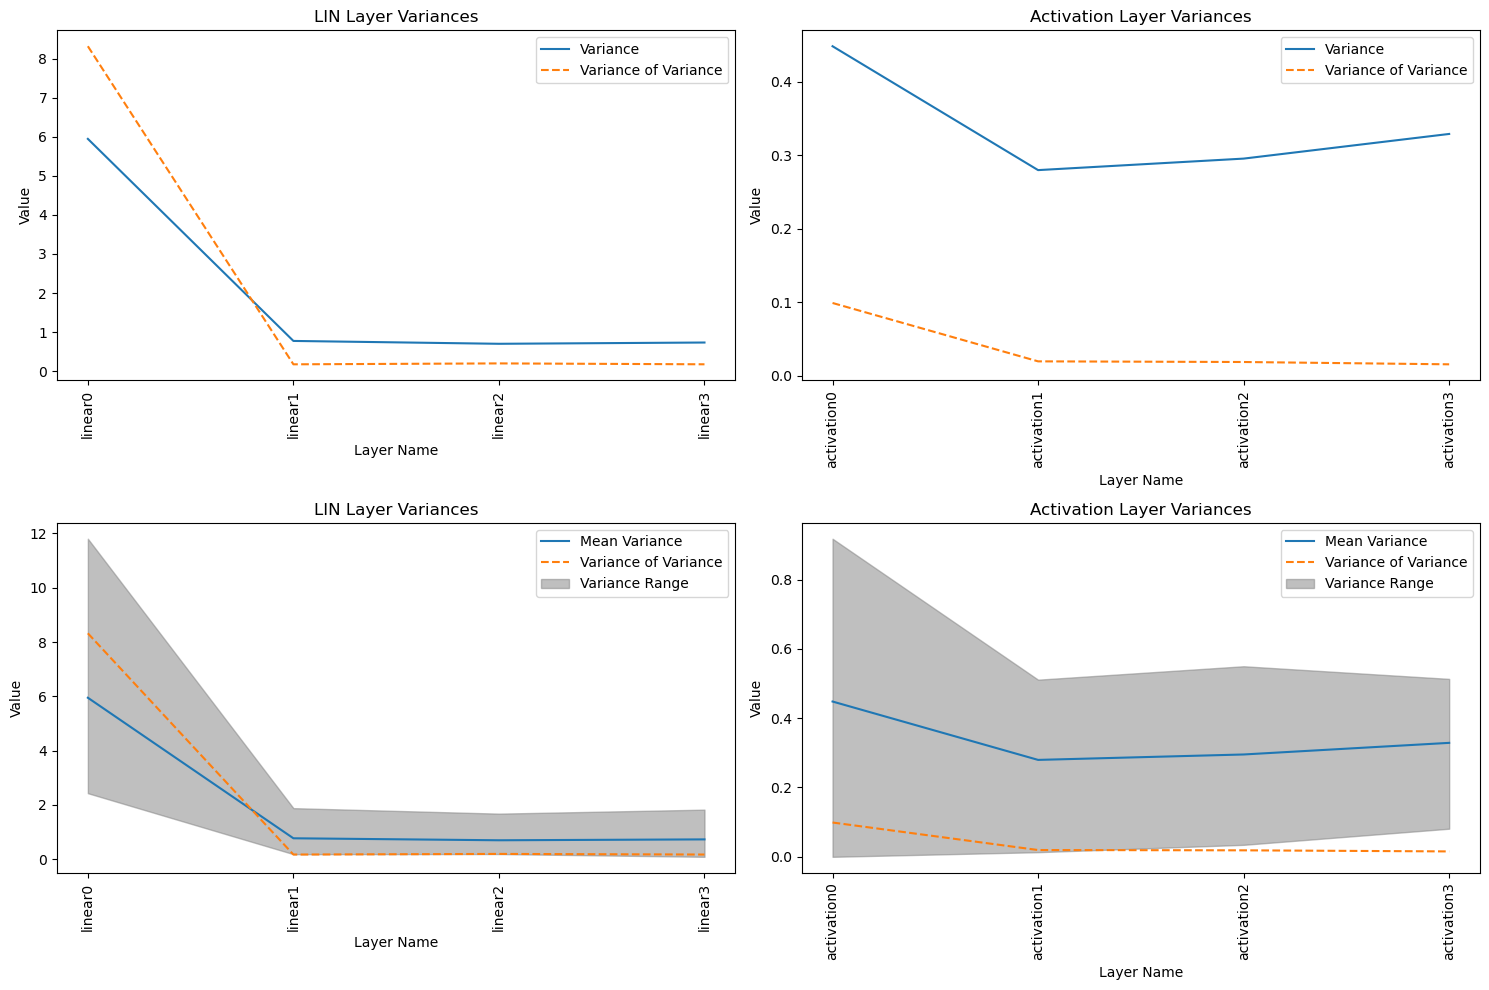

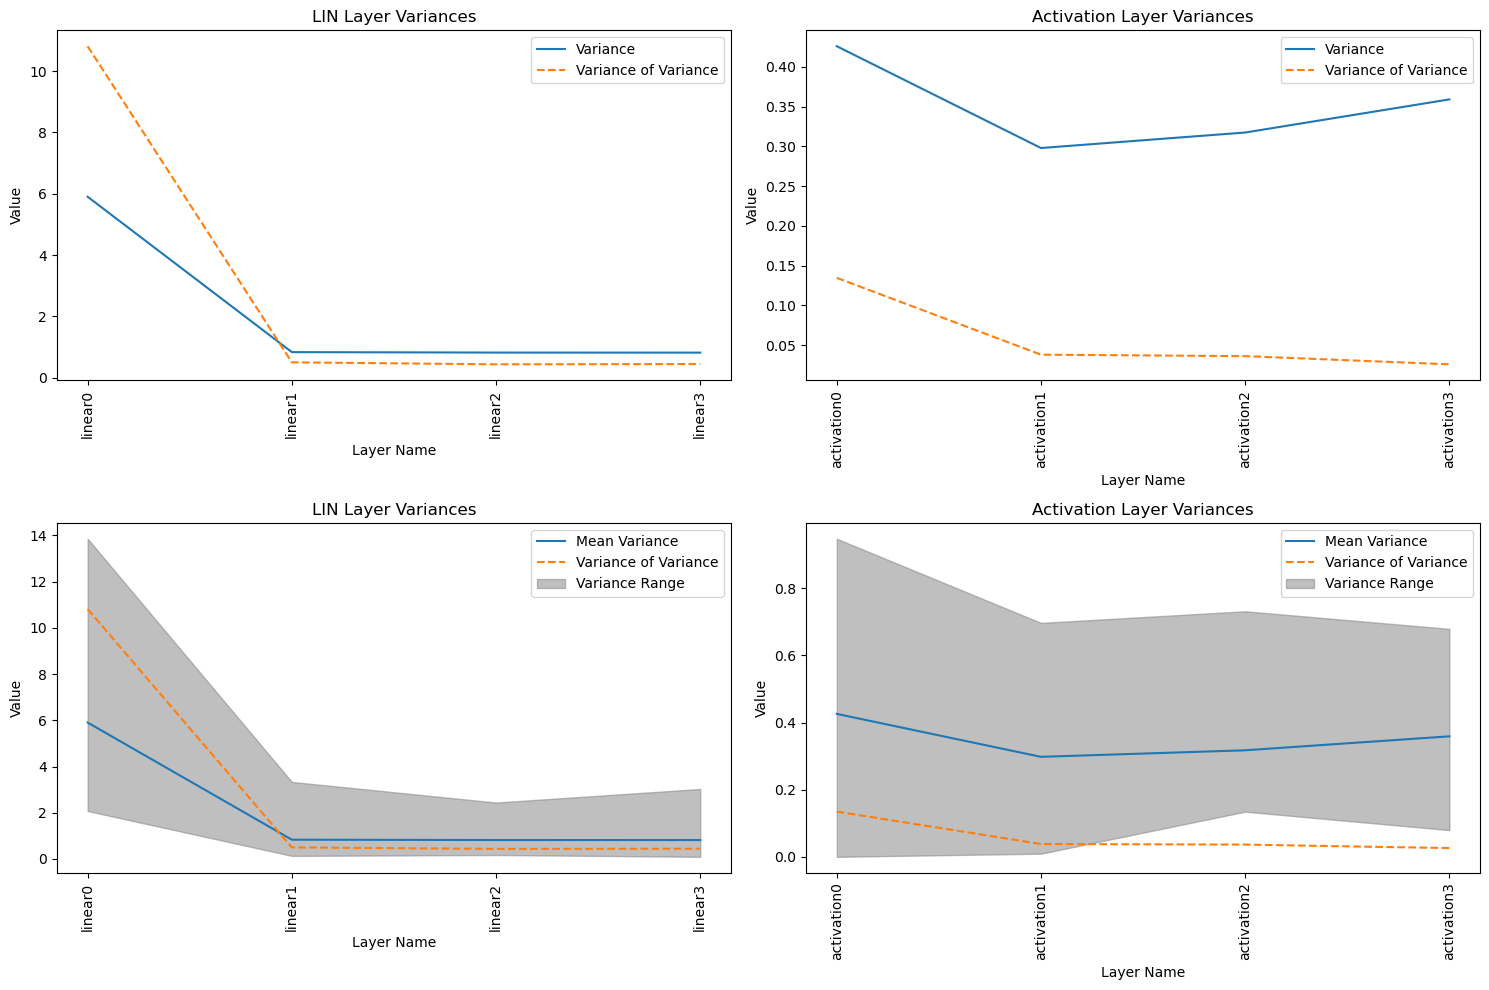

In [32]:
# Assuming your model and dataset variables are already defined
num_pretraining_checkpoints = len(pretraining_checkpoints)

# Create a function to extract variance of variances:
def extract_variance_of_variance_from_names(names, results):
    return [results[name]['variance_of_variance'] for name in names]

# Your original plotting code (for the baseline model) goes here...

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params).to(device)

# Now, loop through the pretraining_checkpoints
for idx, checkpoint in enumerate(pretraining_checkpoints):
    # Load model state_dict from checkpoint
    model.load_state_dict(checkpoint['model_state_dict'])
    
    # Compute the layer variances for the checkpointed model
    results_checkpoint, variances_checkpoint = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device='cpu', cnn=False)
    
    plot_variances_by_layer_type(variances_checkpoint, results_checkpoint, cnn = False, ignore_final_layer=True)

In [34]:
test_acc = eval(pre_trained_model, device, dataset.pretrain_test_loader, False)
print(f"Test Accuracy on training classes: {test_acc:.2f}")


Test Accuracy on training classes: 0.93


#### finetuning expermient

In [35]:
dataset_wrapped.update_phase('finetune')

In [37]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 4.6721110343933105, Variance of Variance: 2.0807394981384277
Layer activation0 - Variance: 0.30242612957954407, Variance of Variance: 0.06138942763209343
Layer linear1 - Variance: 0.5255032777786255, Variance of Variance: 0.03924732282757759
Layer activation1 - Variance: 0.19847549498081207, Variance of Variance: 0.009809574112296104
Layer linear2 - Variance: 0.3971804976463318, Variance of Variance: 0.04430035501718521
Layer activation2 - Variance: 0.18659357726573944, Variance of Variance: 0.007284069433808327
Layer linear3 - Variance: 0.40628910064697266, Variance of Variance: 0.03074556775391102
Layer activation3 - Variance: 0.21093425154685974, Variance of Variance: 0.00606776587665081
Layer linear4 - Variance: 3.7058932781219482, Variance of Variance: 8.014010429382324
Layer activation4 - Variance: 3.7828526496887207, Variance of Variance: 1.5169333219528198


/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(activation_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(activation_layer_names, rotation=90)


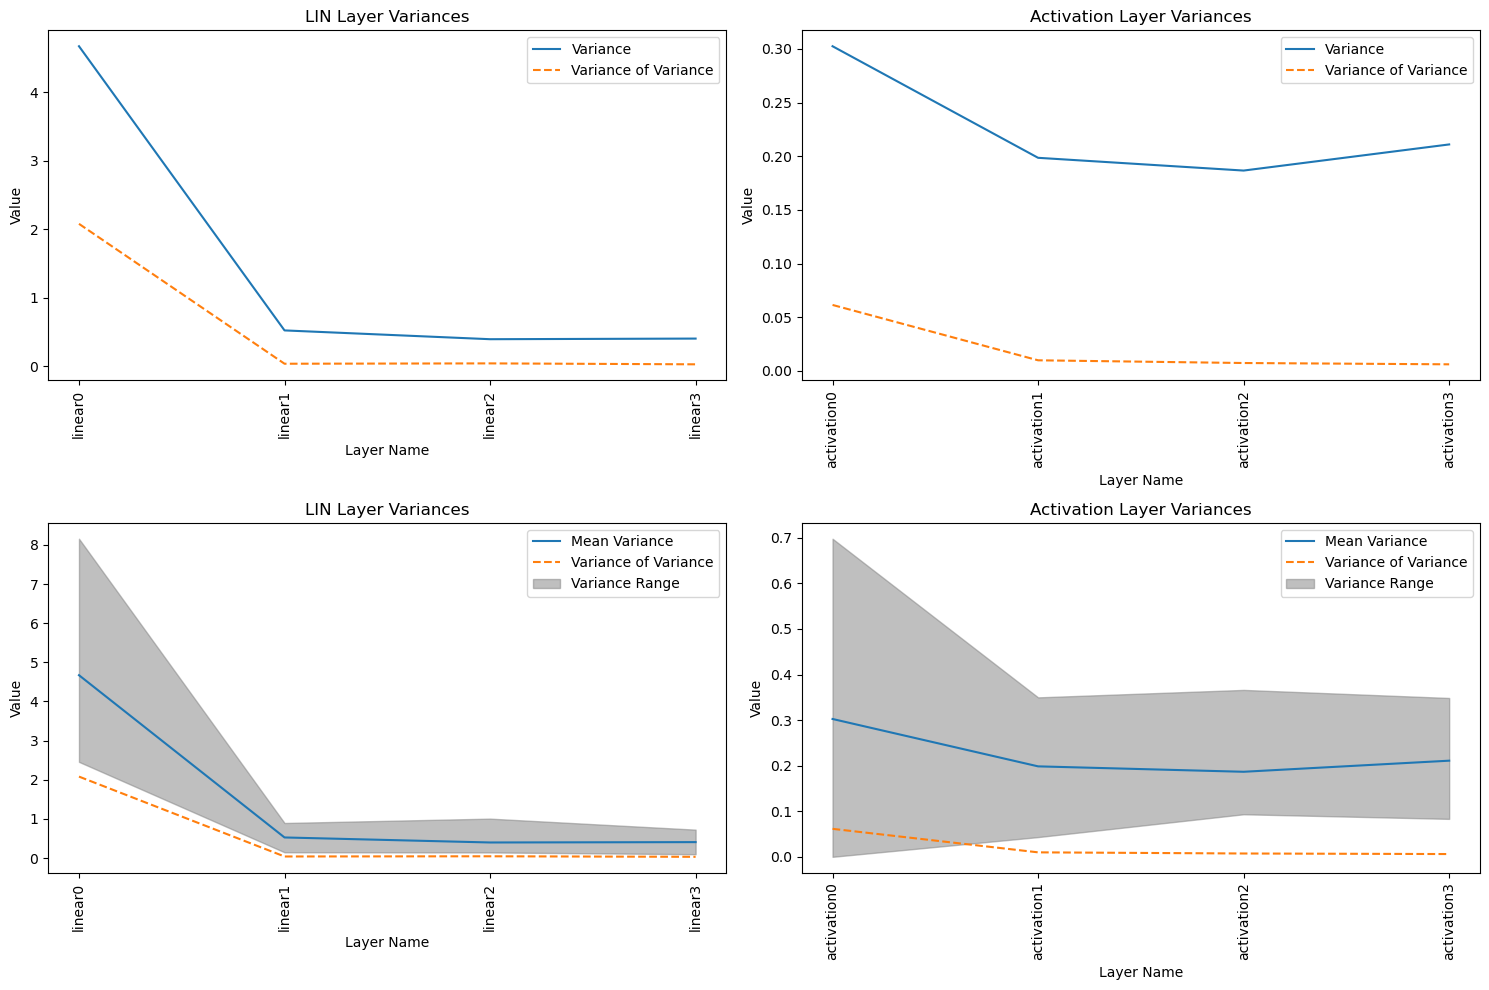

In [38]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

In [71]:
from tqdm import tqdm

num_experiments = 5
experiments = []

for i in tqdm(range(num_experiments)):
    print('experiment number: ', i)
    cut_models = []
    for cut in range(depth):
        temp = {}
        temp['cut_model'] = cut_model(pre_trained_model, cut_point = cut, freeze = True)
        finetuned_acc, finetuned_test_acc, finetuned_model ,checkpoints_temp = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
        temp['finetuned_acc'] = finetuned_acc
        temp['finetuned_test_acc'] = finetuned_test_acc
        temp['finetuned_model'] = finetuned_model
        temp['checkpoints'] = checkpoints_temp
        cut_models.append(temp)  
    experiments.append(cut_models)

experiment number:  0


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 	Training Accuracy: 74.48%
Validation Accuracy: 73.47%
Epoch: 1 	Training Accuracy: 84.92%
Validation Accuracy: 85.71%
Epoch: 2 	Training Accuracy: 88.43%
Validation Accuracy: 88.88%
Epoch: 3 	Training Accuracy: 90.11%
Validation Accuracy: 90.44%


 20%|██        | 1/5 [00:11<00:45, 11.36s/it]

Epoch: 0 	Training Accuracy: 59.24%
Validation Accuracy: 59.46%
Epoch: 1 	Training Accuracy: 66.19%
Validation Accuracy: 64.83%
Epoch: 2 	Training Accuracy: 69.79%
Validation Accuracy: 68.81%
Epoch: 3 	Training Accuracy: 73.63%
Validation Accuracy: 73.23%


 40%|████      | 2/5 [00:22<00:33, 11.26s/it]

Epoch: 0 	Training Accuracy: 57.13%
Validation Accuracy: 56.73%
Epoch: 1 	Training Accuracy: 61.52%
Validation Accuracy: 60.85%
Epoch: 2 	Training Accuracy: 62.96%
Validation Accuracy: 62.93%
Epoch: 3 	Training Accuracy: 63.31%
Validation Accuracy: 63.13%


 60%|██████    | 3/5 [00:33<00:22, 11.34s/it]

Epoch: 0 	Training Accuracy: 54.32%
Validation Accuracy: 53.98%
Epoch: 1 	Training Accuracy: 58.29%
Validation Accuracy: 56.90%
Epoch: 2 	Training Accuracy: 61.54%
Validation Accuracy: 60.68%
Epoch: 3 	Training Accuracy: 61.43%
Validation Accuracy: 60.54%
val_acc: 0.6054421768707483, max_val_acc: 0.6068027210884354, no_improve_epochs: 1


 80%|████████  | 4/5 [00:45<00:11, 11.34s/it]

Epoch: 0 	Training Accuracy: 37.42%
Validation Accuracy: 37.35%
Epoch: 1 	Training Accuracy: 39.08%
Validation Accuracy: 40.00%
Epoch: 2 	Training Accuracy: 43.37%
Validation Accuracy: 44.15%
Epoch: 3 	Training Accuracy: 45.61%
Validation Accuracy: 45.58%


100%|██████████| 5/5 [00:56<00:00, 11.35s/it]


experiment number:  1


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 	Training Accuracy: 68.33%
Validation Accuracy: 68.78%
Epoch: 1 	Training Accuracy: 81.71%
Validation Accuracy: 83.44%
Epoch: 2 	Training Accuracy: 86.72%
Validation Accuracy: 88.13%
Epoch: 3 	Training Accuracy: 89.38%
Validation Accuracy: 90.27%


 20%|██        | 1/5 [00:11<00:46, 11.69s/it]

Epoch: 0 	Training Accuracy: 55.66%
Validation Accuracy: 56.19%
Epoch: 1 	Training Accuracy: 65.55%
Validation Accuracy: 63.84%
Epoch: 2 	Training Accuracy: 67.85%
Validation Accuracy: 66.94%
Epoch: 3 	Training Accuracy: 71.54%
Validation Accuracy: 70.44%


 40%|████      | 2/5 [00:23<00:34, 11.49s/it]

Epoch: 0 	Training Accuracy: 57.06%
Validation Accuracy: 56.36%
Epoch: 1 	Training Accuracy: 60.04%
Validation Accuracy: 58.95%
Epoch: 2 	Training Accuracy: 62.10%
Validation Accuracy: 61.53%
Epoch: 3 	Training Accuracy: 63.71%
Validation Accuracy: 62.99%


 60%|██████    | 3/5 [00:34<00:22, 11.33s/it]

Epoch: 0 	Training Accuracy: 53.71%
Validation Accuracy: 53.98%
Epoch: 1 	Training Accuracy: 57.60%
Validation Accuracy: 56.60%
Epoch: 2 	Training Accuracy: 59.07%
Validation Accuracy: 58.47%
Epoch: 3 	Training Accuracy: 61.45%
Validation Accuracy: 60.20%


 80%|████████  | 4/5 [00:45<00:11, 11.24s/it]

Epoch: 0 	Training Accuracy: 34.08%
Validation Accuracy: 33.40%
Epoch: 1 	Training Accuracy: 43.49%
Validation Accuracy: 43.98%
Epoch: 2 	Training Accuracy: 45.02%
Validation Accuracy: 45.71%
Epoch: 3 	Training Accuracy: 46.54%
Validation Accuracy: 46.94%


100%|██████████| 5/5 [00:56<00:00, 11.24s/it]


experiment number:  2


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 	Training Accuracy: 67.87%
Validation Accuracy: 69.66%
Epoch: 1 	Training Accuracy: 80.63%
Validation Accuracy: 81.12%
Epoch: 2 	Training Accuracy: 87.38%
Validation Accuracy: 87.07%
Epoch: 3 	Training Accuracy: 89.79%
Validation Accuracy: 89.76%


 20%|██        | 1/5 [00:11<00:44, 11.16s/it]

Epoch: 0 	Training Accuracy: 56.95%
Validation Accuracy: 55.71%
Epoch: 1 	Training Accuracy: 63.35%
Validation Accuracy: 61.53%
Epoch: 2 	Training Accuracy: 68.21%
Validation Accuracy: 67.69%
Epoch: 3 	Training Accuracy: 71.88%
Validation Accuracy: 71.29%


 40%|████      | 2/5 [00:22<00:33, 11.11s/it]

Epoch: 0 	Training Accuracy: 46.84%
Validation Accuracy: 46.53%
Epoch: 1 	Training Accuracy: 55.25%
Validation Accuracy: 54.76%
Epoch: 2 	Training Accuracy: 58.93%
Validation Accuracy: 57.41%
Epoch: 3 	Training Accuracy: 59.41%
Validation Accuracy: 58.50%


 60%|██████    | 3/5 [00:33<00:22, 11.18s/it]

Epoch: 0 	Training Accuracy: 51.67%
Validation Accuracy: 52.28%
Epoch: 1 	Training Accuracy: 54.17%
Validation Accuracy: 54.86%
Epoch: 2 	Training Accuracy: 56.59%
Validation Accuracy: 56.77%
Epoch: 3 	Training Accuracy: 57.29%
Validation Accuracy: 57.04%


 80%|████████  | 4/5 [00:44<00:11, 11.23s/it]

Epoch: 0 	Training Accuracy: 34.89%
Validation Accuracy: 36.39%
Epoch: 1 	Training Accuracy: 43.19%
Validation Accuracy: 43.98%
Epoch: 2 	Training Accuracy: 46.27%
Validation Accuracy: 48.16%
Epoch: 3 	Training Accuracy: 48.14%
Validation Accuracy: 49.76%


100%|██████████| 5/5 [00:55<00:00, 11.19s/it]


experiment number:  3


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 	Training Accuracy: 75.31%
Validation Accuracy: 74.97%
Epoch: 1 	Training Accuracy: 84.99%
Validation Accuracy: 84.97%
Epoch: 2 	Training Accuracy: 88.52%
Validation Accuracy: 88.03%
Epoch: 3 	Training Accuracy: 89.96%
Validation Accuracy: 89.90%


 20%|██        | 1/5 [00:11<00:45, 11.35s/it]

Epoch: 0 	Training Accuracy: 64.37%
Validation Accuracy: 63.50%
Epoch: 1 	Training Accuracy: 69.50%
Validation Accuracy: 67.72%
Epoch: 2 	Training Accuracy: 73.58%
Validation Accuracy: 72.24%
Epoch: 3 	Training Accuracy: 76.75%
Validation Accuracy: 75.78%


 40%|████      | 2/5 [00:22<00:33, 11.29s/it]

Epoch: 0 	Training Accuracy: 56.78%
Validation Accuracy: 58.10%
Epoch: 1 	Training Accuracy: 60.03%
Validation Accuracy: 59.76%
Epoch: 2 	Training Accuracy: 61.40%
Validation Accuracy: 60.65%
Epoch: 3 	Training Accuracy: 62.83%
Validation Accuracy: 61.94%


 60%|██████    | 3/5 [00:33<00:22, 11.24s/it]

Epoch: 0 	Training Accuracy: 50.91%
Validation Accuracy: 53.06%
Epoch: 1 	Training Accuracy: 56.92%
Validation Accuracy: 56.94%
Epoch: 2 	Training Accuracy: 60.45%
Validation Accuracy: 60.10%
Epoch: 3 	Training Accuracy: 60.35%
Validation Accuracy: 59.46%
val_acc: 0.5945578231292517, max_val_acc: 0.6010204081632653, no_improve_epochs: 1


 80%|████████  | 4/5 [00:44<00:11, 11.15s/it]

Epoch: 0 	Training Accuracy: 35.67%
Validation Accuracy: 35.82%
Epoch: 1 	Training Accuracy: 44.32%
Validation Accuracy: 44.69%
Epoch: 2 	Training Accuracy: 47.66%
Validation Accuracy: 47.41%
Epoch: 3 	Training Accuracy: 49.24%
Validation Accuracy: 49.39%


100%|██████████| 5/5 [00:55<00:00, 11.14s/it]


experiment number:  4


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 	Training Accuracy: 72.24%
Validation Accuracy: 71.67%
Epoch: 1 	Training Accuracy: 82.49%
Validation Accuracy: 83.06%
Epoch: 2 	Training Accuracy: 87.10%
Validation Accuracy: 87.11%
Epoch: 3 	Training Accuracy: 89.16%
Validation Accuracy: 89.35%


 20%|██        | 1/5 [00:11<00:44, 11.12s/it]

Epoch: 0 	Training Accuracy: 53.95%
Validation Accuracy: 55.58%
Epoch: 1 	Training Accuracy: 64.59%
Validation Accuracy: 64.32%
Epoch: 2 	Training Accuracy: 69.59%
Validation Accuracy: 68.47%
Epoch: 3 	Training Accuracy: 71.97%
Validation Accuracy: 71.22%


 40%|████      | 2/5 [00:22<00:33, 11.05s/it]

Epoch: 0 	Training Accuracy: 55.11%
Validation Accuracy: 55.37%
Epoch: 1 	Training Accuracy: 57.81%
Validation Accuracy: 57.31%
Epoch: 2 	Training Accuracy: 60.04%
Validation Accuracy: 58.67%
Epoch: 3 	Training Accuracy: 60.84%
Validation Accuracy: 59.49%


 60%|██████    | 3/5 [00:33<00:22, 11.02s/it]

Epoch: 0 	Training Accuracy: 52.95%
Validation Accuracy: 52.18%
Epoch: 1 	Training Accuracy: 56.13%
Validation Accuracy: 55.24%
Epoch: 2 	Training Accuracy: 58.68%
Validation Accuracy: 57.45%
Epoch: 3 	Training Accuracy: 60.01%
Validation Accuracy: 58.57%


 80%|████████  | 4/5 [00:44<00:11, 11.02s/it]

Epoch: 0 	Training Accuracy: 46.49%
Validation Accuracy: 47.11%
Epoch: 1 	Training Accuracy: 47.51%
Validation Accuracy: 47.86%
Epoch: 2 	Training Accuracy: 50.03%
Validation Accuracy: 50.61%
Epoch: 3 	Training Accuracy: 51.29%
Validation Accuracy: 52.21%


100%|██████████| 5/5 [00:55<00:00, 11.00s/it]


In [72]:
torch.save(experiments, 'experiments_results_MNIST_50-50.pth')

AttributeError: Can't pickle local object 'compute_layer_variances_dense.<locals>.create_hook.<locals>.hook'

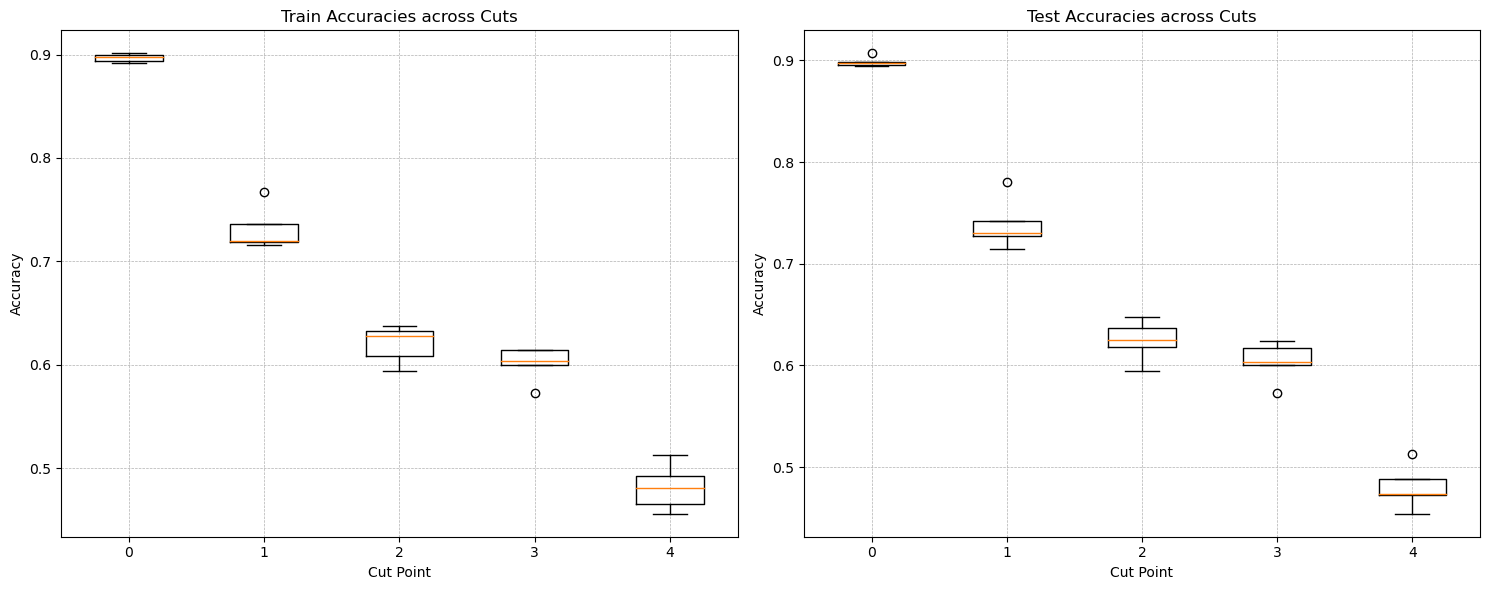

In [73]:
import matplotlib.pyplot as plt

# Initialize lists to store all accuracies for each cut point
train_accuracies = [[] for _ in range(depth)]
test_accuracies = [[] for _ in range(depth)]

# Populate the lists with accuracy values
for cut_models in experiments:
    for cut, model_data in enumerate(cut_models):
        train_accuracies[cut].append(model_data['finetuned_acc'])
        test_accuracies[cut].append(model_data['finetuned_test_acc'])

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot training accuracies
axs[0].boxplot(train_accuracies)
axs[0].set_title('Train Accuracies across Cuts')
axs[0].set_xlabel('Cut Point')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(range(1, depth + 1))
axs[0].set_xticklabels(range(depth))
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot test accuracies
axs[1].boxplot(test_accuracies)
axs[1].set_title('Test Accuracies across Cuts')
axs[1].set_xlabel('Cut Point')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1, depth + 1))
axs[1].set_xticklabels(range(depth))
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plots
plt.tight_layout()
plt.show()

----

In [19]:
cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(pre_trained_model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_train_acc, finetuned_test_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
    temp['finetuned_train_acc'] = finetuned_train_acc
    temp['finetuned_test_acc'] = finetuned_test_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

Epoch: 0 	Training Accuracy: 73.21%
Validation Accuracy: 74.49%
Epoch: 1 	Training Accuracy: 83.59%
Validation Accuracy: 83.71%
Epoch: 2 	Training Accuracy: 87.89%
Validation Accuracy: 87.72%
Epoch: 3 	Training Accuracy: 89.93%
Validation Accuracy: 90.00%
Epoch: 0 	Training Accuracy: 57.77%
Validation Accuracy: 58.10%
Epoch: 1 	Training Accuracy: 69.55%
Validation Accuracy: 70.51%
Epoch: 2 	Training Accuracy: 75.39%
Validation Accuracy: 76.80%
Epoch: 3 	Training Accuracy: 79.60%
Validation Accuracy: 80.37%
Epoch: 0 	Training Accuracy: 55.61%
Validation Accuracy: 56.43%
Epoch: 1 	Training Accuracy: 61.05%
Validation Accuracy: 61.56%
Epoch: 2 	Training Accuracy: 64.00%
Validation Accuracy: 65.00%
Epoch: 3 	Training Accuracy: 67.67%
Validation Accuracy: 68.50%
Epoch: 0 	Training Accuracy: 49.88%
Validation Accuracy: 51.22%
Epoch: 1 	Training Accuracy: 55.54%
Validation Accuracy: 57.07%
Epoch: 2 	Training Accuracy: 57.20%
Validation Accuracy: 58.71%
Epoch: 3 	Training Accuracy: 58.77%
Vali

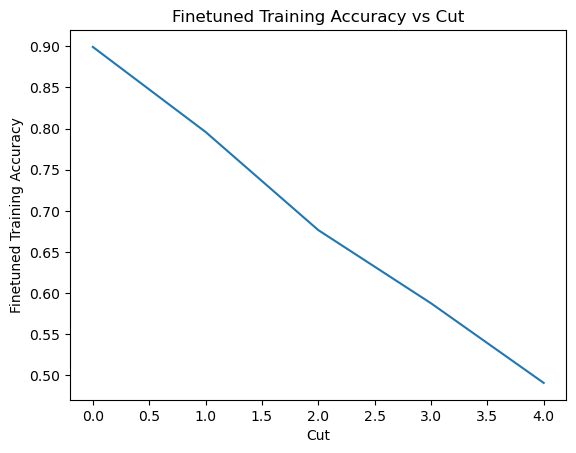

In [20]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_train_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Training Accuracy')
plt.title('Finetuned Training Accuracy vs Cut')
plt.show()

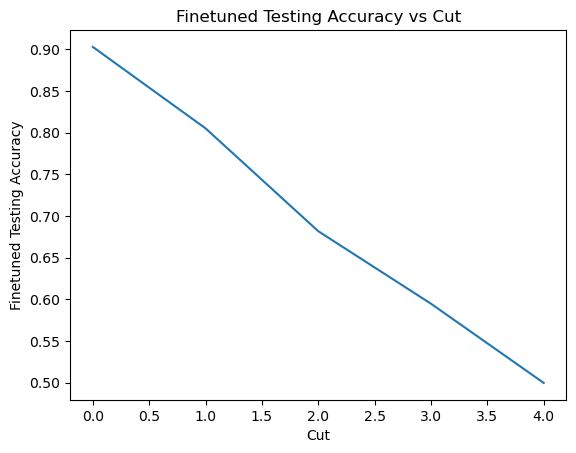

In [21]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_test_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Testing Accuracy')
plt.title('Finetuned Testing Accuracy vs Cut')
plt.show()

-----

## Fashion Mnist

### Baseline, end to end trained model

In [4]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'mps'
depth = 5

fashion_dataset = FashionMNISTtrainer(batch_size)
params = dict(device=device,
                width=50, lr=0.01, num_train=4,
                sb=1, depth= depth, sw=1.5)

fashion_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params['depth'], params['width']).to(device)

pretrain_acc, pre_trained_model = compute_training_acc_epochs(fashion_model, fashion_dataset, params, debug=True)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Train set: Average loss: 0.8191, Accuracy: 42975.0/60000 (72%)

Epoch: 0 	Training Accuracy: 71.62%

Train set: Average loss: 0.6768, Accuracy: 45237.0/60000 (75%)

Epoch: 1 	Training Accuracy: 75.39%

Train set: Average loss: 0.6093, Accuracy: 46827.0/60000 (78%)

Epoch: 2 	Training Accuracy: 78.05%

Train set: Average loss: 0.5691, Accuracy: 47610.0/60000 (79%)

Epoch: 3 	Training Accuracy: 79.35%

Train set: Average loss: 0.5691, 

### finetuned staring from regular mnist 

In [6]:
#luckily, the number of classes is the same, so we don't need to change the last layer.

cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], fashion_dataset, params, debug=False)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

In [9]:
from pprint import pprint

for i, mod in enumerate(cut_models):
    print(f"Cut {i}:")
    pprint(mod['finetuned_acc'])

Cut 0:
0.7911
Cut 1:
0.7381833333333333
Cut 2:
0.6858333333333333
Cut 3:
0.6187833333333334
Cut 4:
0.27591666666666664


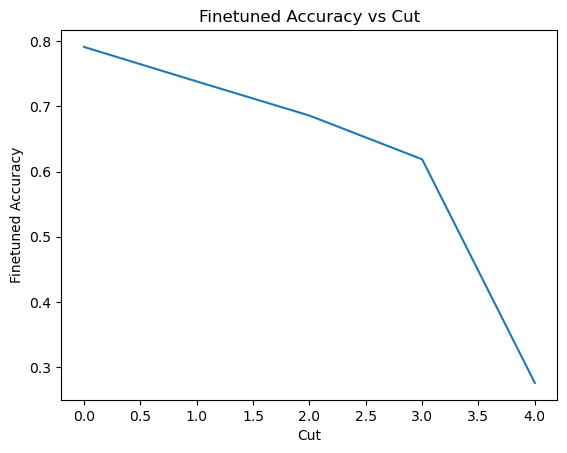

In [7]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

----